<a href="https://colab.research.google.com/github/Marcelo0479/machinelearn/blob/main/Machine_learning_Clusteriza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - Importando e preprocessando os dados

In [229]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
SEED = 1234

In [230]:
url ='https://raw.githubusercontent.com/alura-cursos/Clustering/Aula-1.-An%C3%A1lise-Explorat%C3%B3ria/Wine.csv'
df = pd.read_csv(url)

In [231]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [232]:
df.shape

(178, 14)

In [233]:
df = df.rename(columns = {'Alcohol' : 'Alcool', 'Ash' : 'Po', 'Ash_Alcanity': 'Alcalinidade_po',
                          'Magnesium' : 'Magnesio','Total_Phenols' : 'Total_Fenois',
                          'Nonflavanoid_Phenols':'Fenois_nao_flavalonoides','Color_Intensity':'Intensidade_de_cor'})

In [234]:
df.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [235]:
df.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [236]:
matriz_corr = df.corr()
matriz_corr

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
Alcool,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
Po,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
Alcalinidade_po,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnesio,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
Total_Fenois,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
Fenois_nao_flavalonoides,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
Intensidade_de_cor,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


In [237]:
pip install biokit

In [238]:
from biokit.viz import corrplot
import matplotlib.pyplot as plt

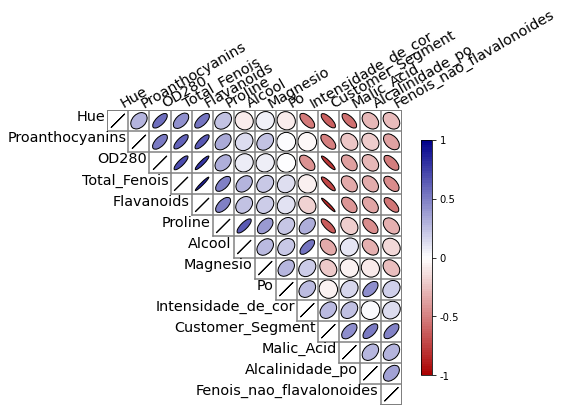

In [239]:
corr_graf = corrplot.Corrplot(matriz_corr)
corr_graf.plot(upper = 'ellipse', fontsize= 'x-large')
fig = plt.gcf()
fig.set_size_inches(13,8)
fig.show()

In [240]:
df_copy = df.copy()

In [241]:
# Normalizando pelo método MinMaxScaler
atributos = df_copy.columns
for atributo in atributos:
  df_copy[atributo] = (df_copy[atributo] - min(df_copy[atributo])) / (max(df_copy[atributo]) - min(df_copy[atributo]))

In [242]:
df_copy.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0.0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0.0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0.0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0.0


In [243]:
from sklearn.preprocessing import MinMaxScaler

In [244]:
min_max_scaler = MinMaxScaler()
np_df = min_max_scaler.fit_transform(df)

In [245]:
df = pd.DataFrame(np_df, columns=df.columns)
df.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0.0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0.0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0.0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0.0


In [246]:
np_df = min_max_scaler.inverse_transform(df)
np_df

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 3.920e+00, 1.065e+03,
        1.000e+00],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 3.400e+00, 1.050e+03,
        1.000e+00],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 3.170e+00, 1.185e+03,
        1.000e+00],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 1.560e+00, 8.350e+02,
        3.000e+00],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 1.620e+00, 8.400e+02,
        3.000e+00],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 1.600e+00, 5.600e+02,
        3.000e+00]])

In [247]:
df_nao_normalizado  = pd.DataFrame(np_df, columns=df.columns)
df_nao_normalizado.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


# 2 - Agrupando com o algoritimo Kmeans e testando visualizações.

In [248]:
from sklearn.cluster import KMeans

In [249]:
agrupador_kmeans = KMeans(n_clusters= 4, random_state=SEED)
agrupador_kmeans.fit(df)
labels_kmeans = agrupador_kmeans.labels_

In [250]:
labels_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 3, 0, 3,
       3, 3, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 0, 0, 3, 3, 0, 0,
       0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 0, 0, 0, 3, 3,
       3, 3, 0, 0, 0, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [251]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= df.Intensidade_de_cor, y= df.Alcool, mode= 'markers', marker= dict(color = labels_kmeans.astype(np.float)), text= labels_kmeans))
fig.show()

In [252]:
agrupador_kmeans = KMeans(n_clusters= 3, random_state=SEED)
agrupador_kmeans.fit(df)
labels_kmeans = agrupador_kmeans.labels_

In [253]:
labels_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [254]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= df.Intensidade_de_cor, y= df.Alcool, mode= 'markers', marker= dict(color = labels_kmeans.astype(np.float)), text= labels_kmeans))
fig.show()

In [255]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x= df.Intensidade_de_cor, y= df.Alcool, z= df.Proline, mode= 'markers', marker= dict(color = labels_kmeans.astype(np.float)), text= [0 , 1 , 2]))
fig.update_layout(autosize=False, width=800, height=800, margin=dict(l=5, r=5, b=6, t=5))
fig.show()

In [256]:
fig.update_layout(scene = dict(
    xaxis_title = 'Intensidade de Cor',
    yaxis_title = 'Alcool',
    zaxis_title = 'Proline'
))
fig.show()

In [257]:
centros_kmeans = pd.DataFrame(agrupador_kmeans.cluster_centers_)
centros_kmeans.columns = df.columns
centros_kmeans.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,0.711096,0.250000,0.587166,0.342955,0.400906,0.644080,0.557138,0.299371,0.470137,0.359386,0.476558,0.693590,0.595958,0.008333
1,0.558324,0.514721,0.574703,0.558700,0.315439,0.240746,0.096616,0.605314,0.237559,0.517343,0.167413,0.153921,0.249323,0.989796
2,0.322960,0.230939,0.469813,0.487823,0.261342,0.438831,0.366294,0.438337,0.383486,0.151704,0.468081,0.555396,0.167494,0.500000


In [258]:
fig.add_trace(go.Scatter3d(x = centros_kmeans.Intensidade_de_cor,
                           y= centros_kmeans.Alcool,
                           z= centros_kmeans.Proline,
                           mode = 'markers',
                           marker = dict(color = 'red'),
                           text = [0, 1, 2]))
fig.show()

# 3 - Implementando DBSCAN

In [259]:
from sklearn.cluster import DBSCAN

In [260]:
agrupador_dbscan = DBSCAN(eps= 1.31, min_samples= 15, metric= 'manhattan')
agrupador_dbscan.fit(df)
labels_dbscan = agrupador_dbscan.labels_
labels_dbscan

array([ 0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
        1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,
        1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  2, -1,  2, -1,  2,
       -1, -1,  2, -1, -1,  2, -1, -1,  2,  2, -1,  2,  2,  2, -1, -1, -1,
        2, -1,  2,  2, -1, -1, -1,  2,  2,  2,  2,  2, -1,  2,  2,  2, -1,
        2,  2,  2,  2,  2,  2,  2,  2])

In [261]:
np.unique(labels_dbscan)

array([-1,  0,  1,  2])

In [262]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x= df.Intensidade_de_cor, y= df.Alcool, z= df.Proline, mode= 'markers', marker= dict(color = labels_dbscan.astype(np.float)), text= labels_dbscan))
fig.update_layout(autosize=False, width=800, height=800, margin=dict(l=5, r=5, b=6, t=5))
fig.show()

# 4 - Implementando o algoritimo MeanShift

In [263]:
from sklearn.cluster import MeanShift

In [264]:
agrupador_meanshift = MeanShift()
agrupador_meanshift.fit(df_nao_normalizado)
labels_meanshift = agrupador_meanshift.labels_
labels_meanshift

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0])

In [265]:
from sklearn.cluster import estimate_bandwidth

In [266]:
BW = estimate_bandwidth(df_nao_normalizado, quantile= 0.3)
print(BW)

189.34410953113326


In [267]:
agrupador_meanshift = MeanShift(bandwidth=BW)
agrupador_meanshift.fit(df_nao_normalizado)
labels_meanshift = agrupador_meanshift.labels_
labels_meanshift

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0])

In [268]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x= df_nao_normalizado.Intensidade_de_cor, y= df_nao_normalizado.Alcool, z= df_nao_normalizado.Proline,
                           mode= 'markers', marker= dict(color = labels_meanshift.astype(np.float)), text= labels_meanshift))
fig.update_layout(autosize=False, width=800, height=800, margin=dict(l=5, r=5, b=6, t=5))
fig.update_layout(scene = dict(
                    xaxis_title='Intensidade de Cor',
                    yaxis_title='Àlcool',
                    zaxis_title='Proline'))
fig.show()

In [269]:
centros_meanshift = pd.DataFrame(agrupador_meanshift.cluster_centers_)
centros_meanshift.columns = df_nao_normalizado.columns
fig.add_trace(go.Scatter3d(x=centros_meanshift['Intensidade_de_cor'],
                         y=centros_meanshift['Alcool'],
                         z=centros_meanshift['Proline'],
                         mode = 'markers',                  
                         marker = dict(color = 'red'),
                        text = [0, 1, 2]))

# 5 - Coeficiente de Silhueta

## Coeficiente de Silhueta Kmeans

In [270]:
from sklearn.metrics import silhouette_score

In [271]:
faixa_n_clusters_kmeans = [i for i in range(2,10)]
faixa_n_clusters_kmeans

[2, 3, 4, 5, 6, 7, 8, 9]

In [272]:
valores_silhueta_kmeans = []
for k in faixa_n_clusters_kmeans:
  agrupador_kmeans = KMeans(n_clusters= k, random_state=SEED)
  labels_kmeans = agrupador_kmeans.fit_predict(df)
  media_silhueta_kmeans = silhouette_score(df, labels_kmeans)
  valores_silhueta_kmeans.append(media_silhueta_kmeans)

In [273]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = faixa_n_clusters_kmeans, y= valores_silhueta_kmeans))
fig.update_layout(autosize=False, width=800, height=800, margin=dict(l=5, r=5, b=6, t=5))
fig.update_layout(
    title = 'Valores de silhueta médios',
    xaxis_title = 'Número de clústeres',
    yaxis_title = 'Valor médio de silhueta'
)

## Coeficiente de Silhueta DBSCAN

In [308]:
faixa_eps = np.linspace(0.1, 3, 15)
faixa_eps

array([0.1       , 0.30714286, 0.51428571, 0.72142857, 0.92857143,
       1.13571429, 1.34285714, 1.55      , 1.75714286, 1.96428571,
       2.17142857, 2.37857143, 2.58571429, 2.79285714, 3.        ])

In [324]:
faixa_samples = [i for i in range(10,100,3)]
faixa_samples

[10,
 13,
 16,
 19,
 22,
 25,
 28,
 31,
 34,
 37,
 40,
 43,
 46,
 49,
 52,
 55,
 58,
 61,
 64,
 67,
 70,
 73,
 76,
 79,
 82,
 85,
 88,
 91,
 94,
 97]

In [325]:
valores_silhueta_dbscan = []
for i in faixa_eps:
  for s in faixa_samples:
    agrupador_dbscan = DBSCAN(eps= i, min_samples= s, metric= 'manhattan')
    labels_dbscan = agrupador_dbscan.fit_predict(df)
    if(len(np.unique(labels_dbscan)) < len(df) and len(np.unique(labels_dbscan)) > 1):
      media_silhueta_dbscan = silhouette_score(df, labels_dbscan)
      valores_silhueta_dbscan.append(media_silhueta_dbscan)

In [326]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x= faixa_eps, y= faixa_samples, z= valores_silhueta_dbscan,
                           mode= 'markers', marker= dict(color = 'red'), text= labels_dbscan))
fig.update_layout(autosize=False, width=800, height=800, margin=dict(l=5, r=5, b=6, t=5))
fig.update_layout(scene = dict(
                    xaxis_title='EPS',
                    yaxis_title='Sample',
                    zaxis_title='Silhuete'))
fig.show()

## Coeficiente de Silhueta MeanShift

In [278]:
faixa_quantil = np.linspace(0.02, 0.5, 15)
faixa_quantil

array([0.02      , 0.05428571, 0.08857143, 0.12285714, 0.15714286,
       0.19142857, 0.22571429, 0.26      , 0.29428571, 0.32857143,
       0.36285714, 0.39714286, 0.43142857, 0.46571429, 0.5       ])

In [279]:
valores_silhueta_meanshift = []
quantil_plot = []
for quantil in faixa_quantil:
  bandwidth = estimate_bandwidth(df, quantile= quantil)
  agrupador_meanshift = MeanShift(bandwidth= bandwidth)
  labels_meanshift = agrupador_meanshift.fit_predict(df)
  if(len(np.unique(labels_meanshift)) < len(df) and len(np.unique(labels_meanshift)) > 1):
    media_silhueta_meanshift = silhouette_score(df, labels_meanshift)
    valores_silhueta_meanshift.append(media_silhueta_meanshift)
    quantil_plot.append(quantil)

In [280]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = quantil_plot,
                         y = valores_silhueta_meanshift))
fig.update_layout(dict(xaxis_title = 'Quantil',
                       yaxis_title = 'Valor médio de silhueta'))
fig.show()

# 6 - Comparando os algoritimos usando o coeficiente de silhueta como critério de qual é o melhor.

In [327]:
agrupador_kmeans = KMeans(n_clusters= 3, random_state=SEED)
agrupador_dbscan = DBSCAN(eps= 1.96, min_samples=37, metric="manhattan")

BW = estimate_bandwidth(df, quantile = 0.19)
agrupador_meanshift = MeanShift(bandwidth = BW)

labels_kmeans = agrupador_kmeans.fit_predict(df)
labels_dbscan = agrupador_dbscan.fit_predict(df)
labels_meanshift = agrupador_meanshift.fit_predict(df)

print("Labels K-means: ", labels_kmeans)
print("Labels DBSCAN: ", labels_dbscan)
print("Labels MeanShift: ", labels_meanshift)

Labels K-means:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Labels DBSCAN:  [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1  0  0  0  0  0  0 -1 -1  0  0
  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
 -1  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0
  0 -1  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1]
Labels MeanShift:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [328]:
print("O coeficiente de silhueta do K-means é:", silhouette_score(df, labels_kmeans))
print("O coeficiente de silhueta do DBSCAN é: ", silhouette_score(df,labels_dbscan))
print("O coeficiente de silhueta do MeanShift é: ", silhouette_score(df,labels_meanshift))

O coeficiente de silhueta do K-means é: 0.36950618492736303
O coeficiente de silhueta do DBSCAN é:  0.26882347961993397
O coeficiente de silhueta do MeanShift é:  0.3448247813495863
